#Multimedia 
##Atividade 4: Análise de Imagens (Processos)

**Alunos:**

Arthur Labaki - 11821BCC017

Vinnicius Pereira - 11821BCC046

In [1]:
# acesso ao google drive para importar imagens, áudio e dados
from google.colab import drive;
drive.mount('/content/gdrive/');

Mounted at /content/gdrive/


In [108]:
#imports
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import colorsys
from sklearn.metrics import mean_squared_error  
from skimage import data
from PIL import Image
import math
import time
from os import listdir, path
import glob
from IPython.utils import path

##**Exercicio 1**

##**Exercicio 2**

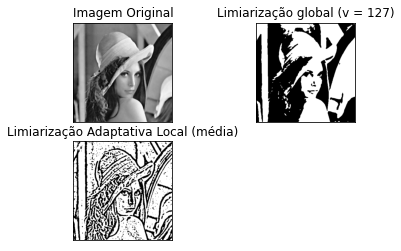

In [48]:
# Carrega a imagem 
img = cv.imread('/content/gdrive/MyDrive/Multimidia/Lab4/img_geral/e16.jpg', 0)
img = cv.medianBlur(img,5) 

#Ex 2
# img = cv.imread('/content/gdrive/MyDrive/Multimidia/Lab4/img_geral/cameraman.tif', 0)
#img = cv.medianBlur(img,5)

#Ex 3
# img = cv.imread('/content/gdrive/MyDrive/Multimidia/Lab4/img_geral/h1.jpg', 0)
# img = cv.medianBlur(img,5)

# Gera a limiarização global com limiar = v
v = 127
ret,th1 = cv.threshold(img,v,255,cv.THRESH_BINARY)

# Gera a a limiarização adaptativa local com o cálculo da média
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)

# Plota as 3 imagens
titles = ['Imagem Original', 'Limiarização global (v = 127)',
            'Limiarização Adaptativa Local (média)']
imagens = [img, th1, th2]
for i in range(3):
    plt.subplot(2,2,i+1),plt.imshow(imagens[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

É possivel analisar que esse método leva em consideração os detalhes da imagem, diferente do primeiro que apenas define um limiar e usa para a imagem inteira. Com isso, a limiarização adaptativa é superior à global em relação a quantidade de detalhes.

##**Exercicio 3**

##**Exercicio 4**


 Classe Bird:



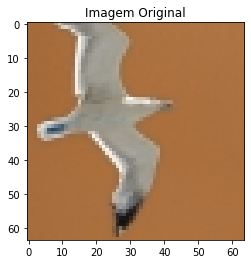

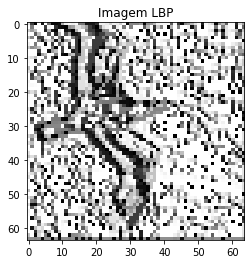

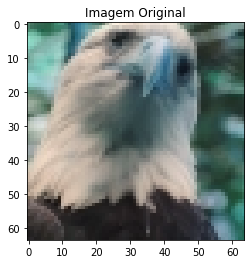

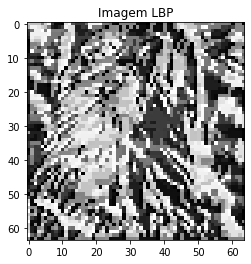

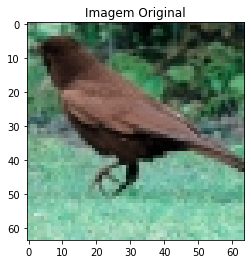

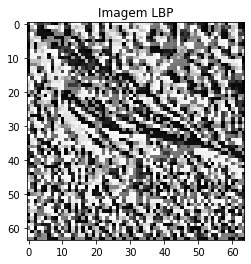

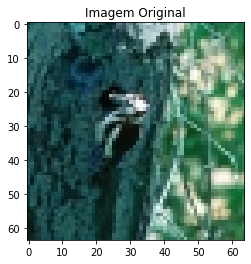

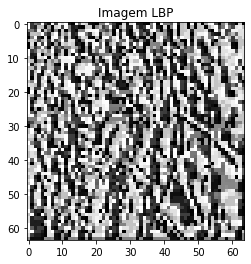

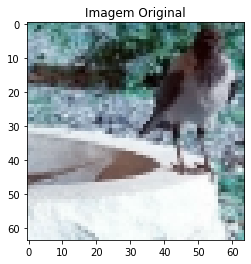

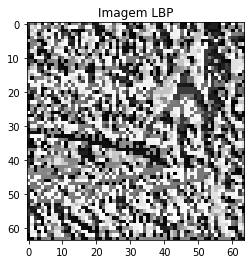

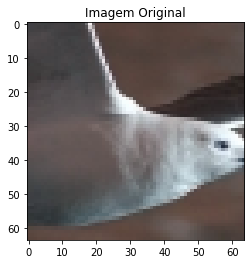

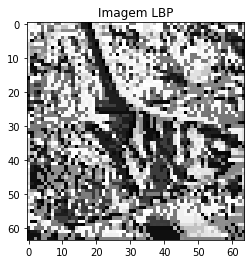

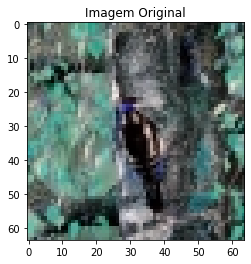

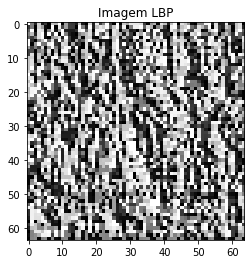

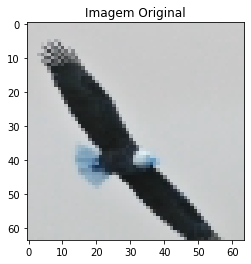

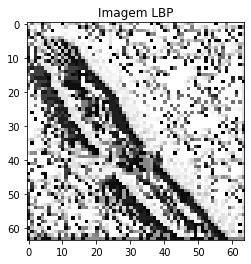

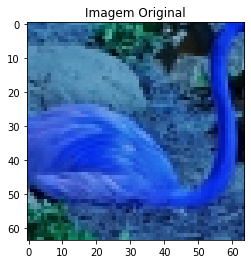

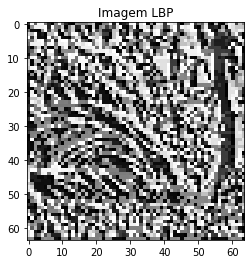

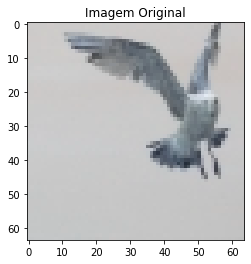

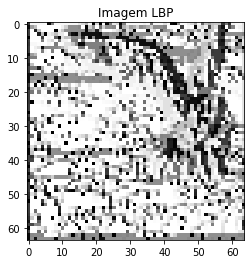

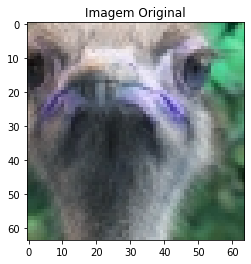

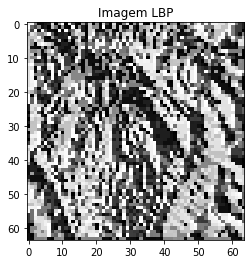

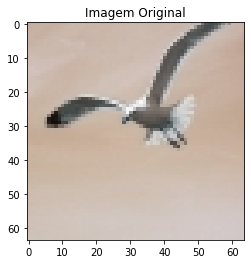

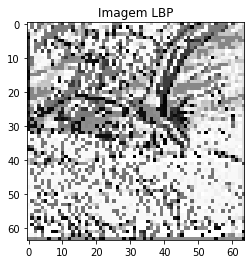

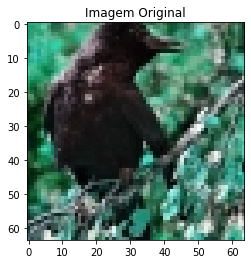

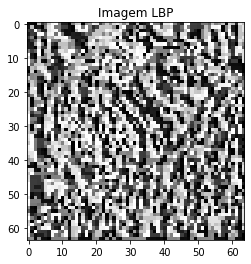

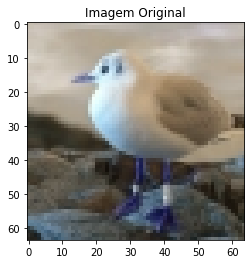

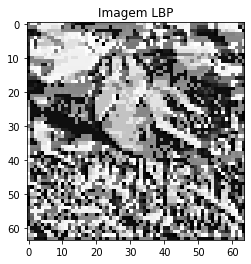

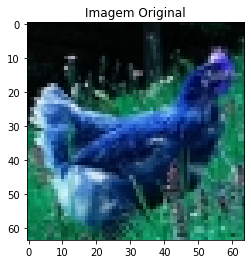

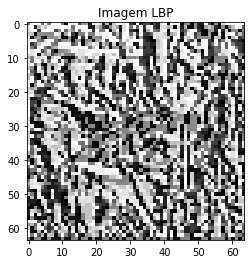

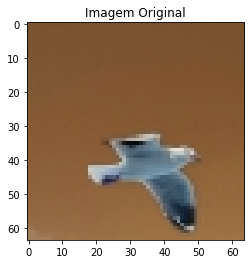

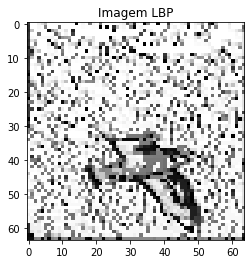

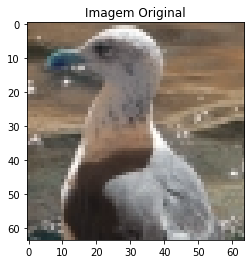

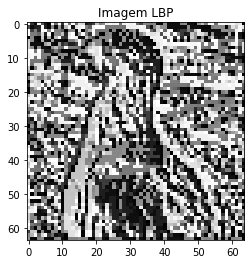

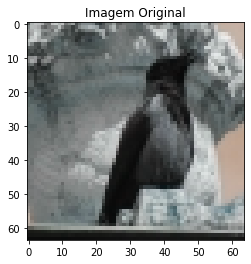

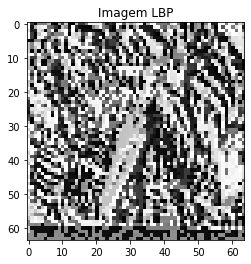

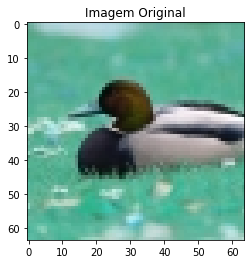

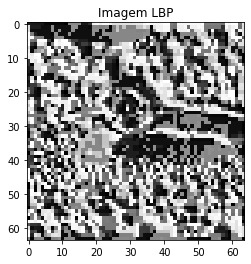

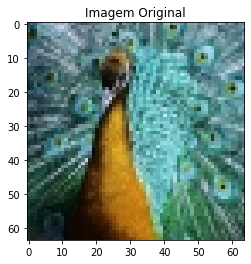

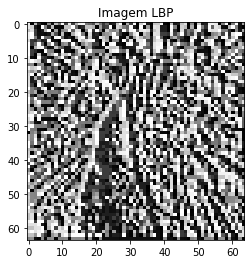

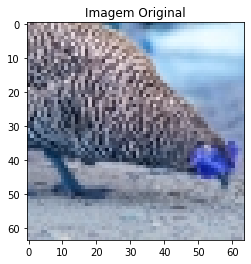

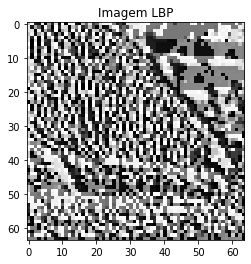

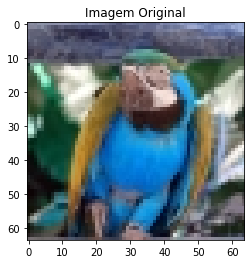

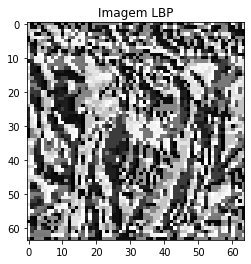

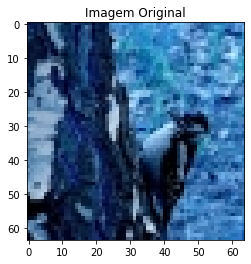

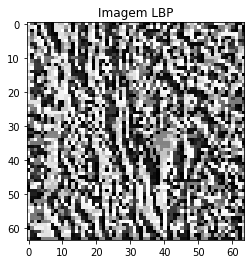

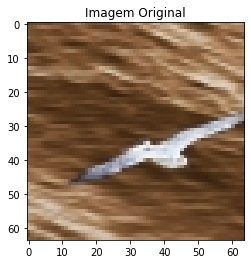

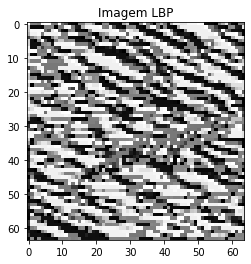

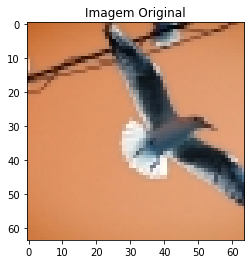

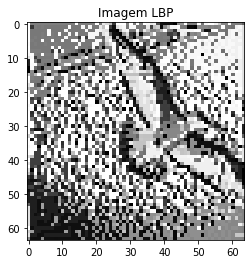

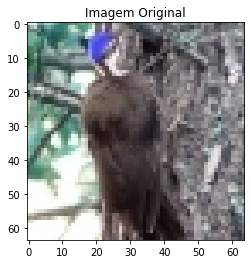

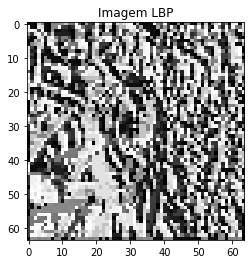

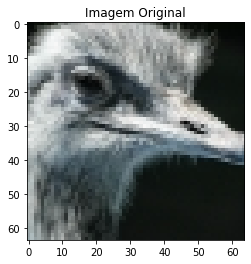

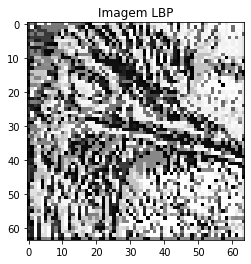

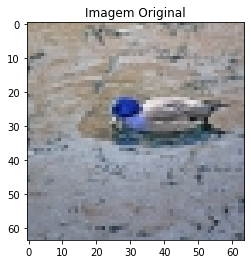

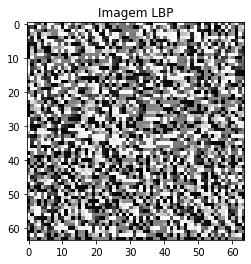

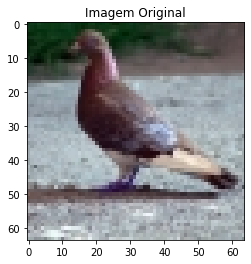

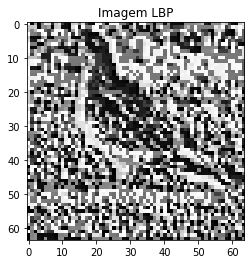

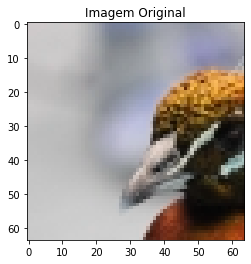

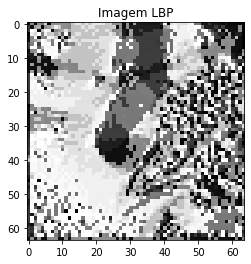

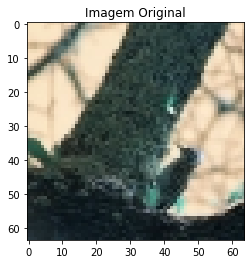

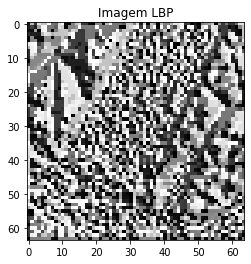

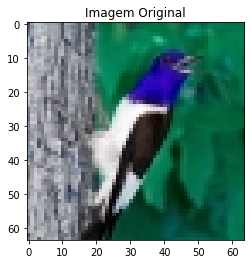

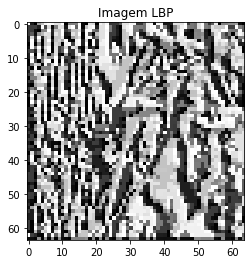

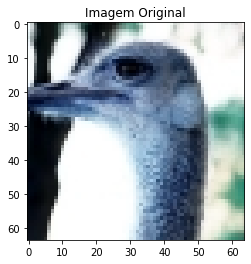

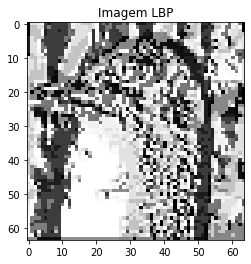

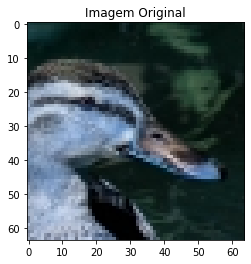

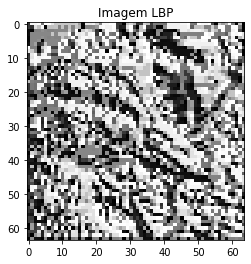

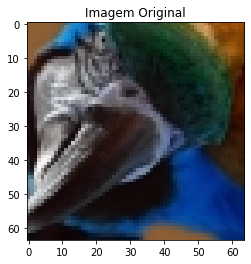

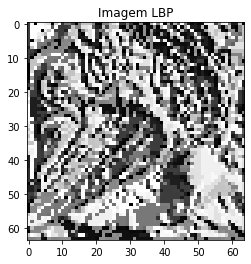

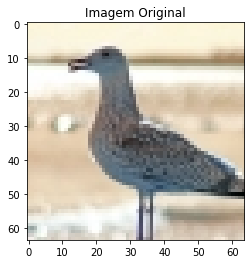

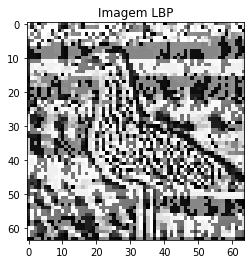

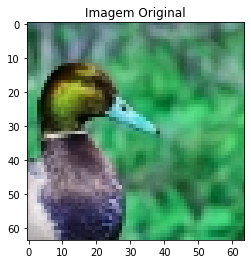

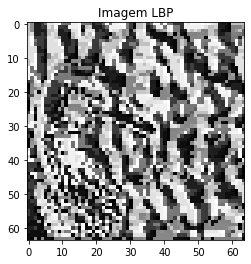

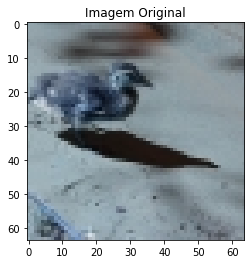

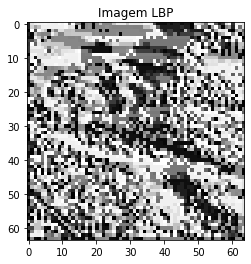

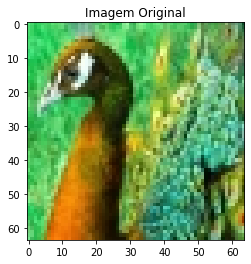

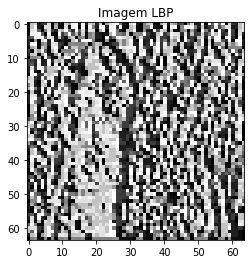

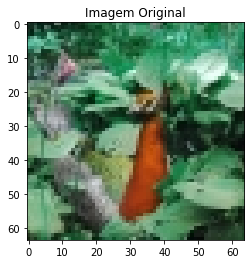

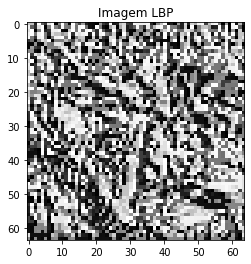





 Classe Dog:



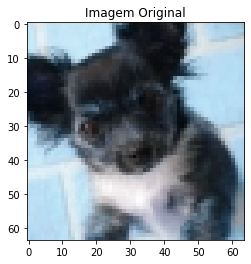

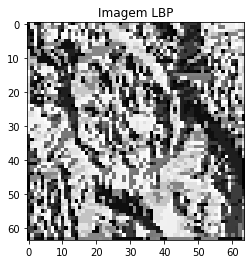

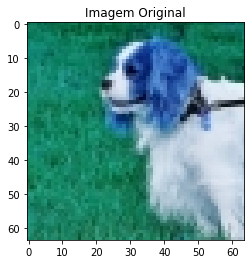

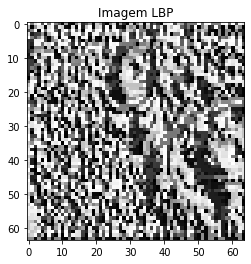

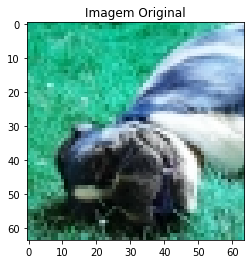

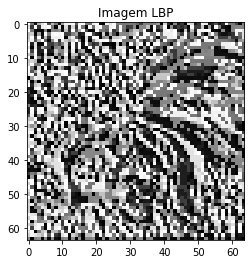

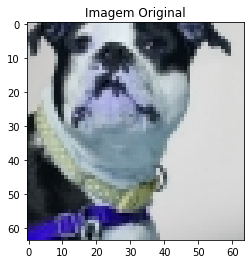

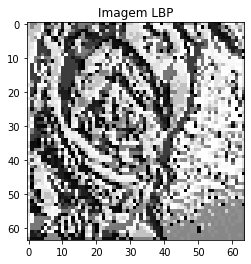

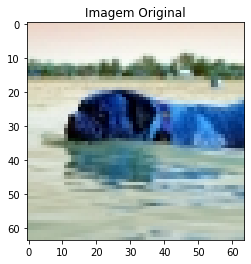

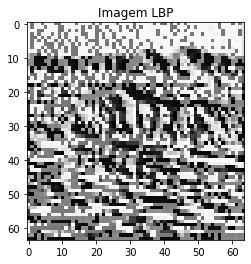

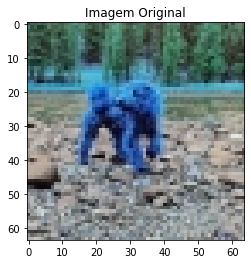

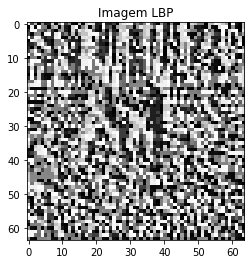

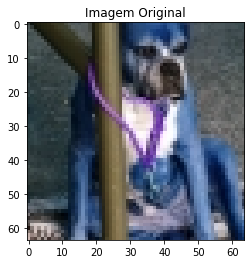

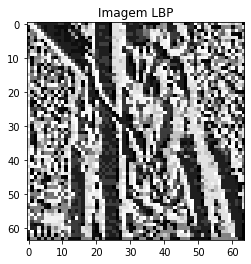

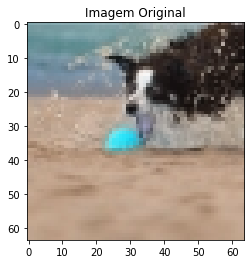

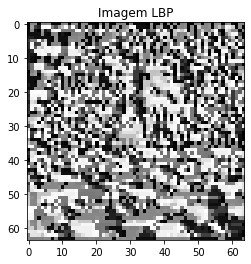

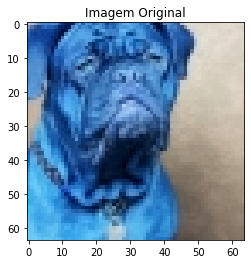

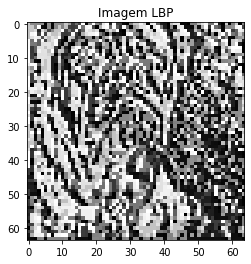

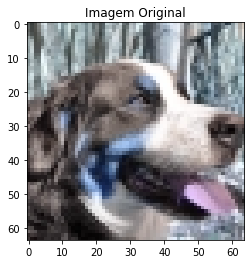

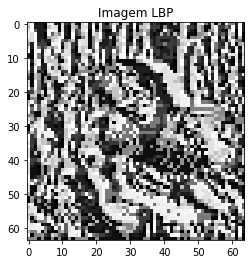

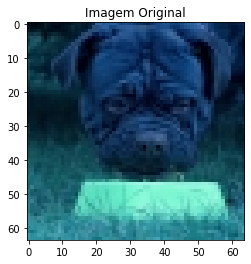

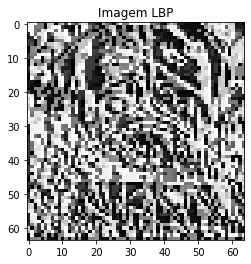

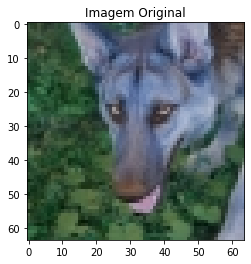

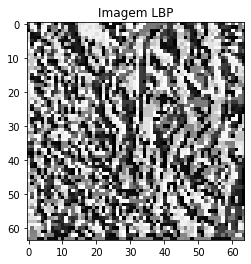

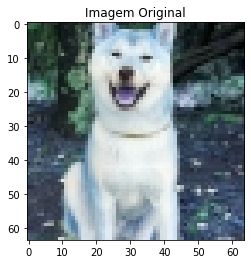

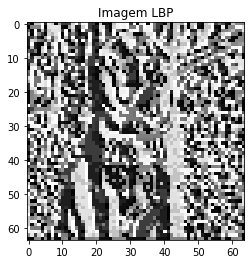

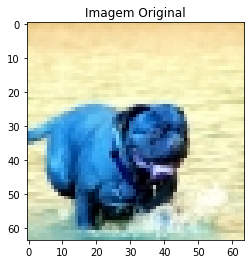

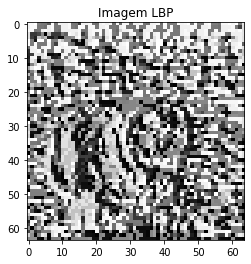

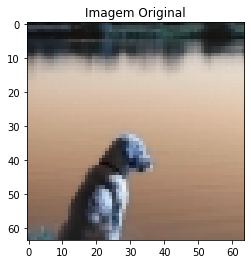

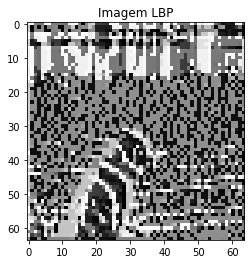

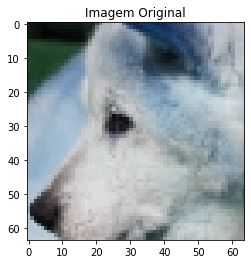

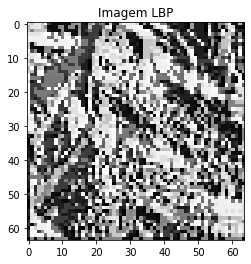

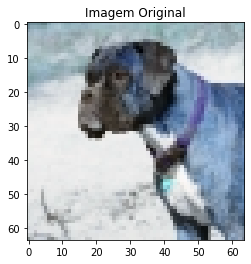

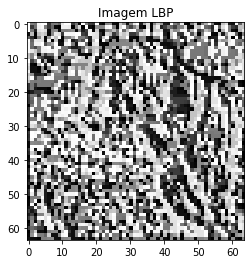

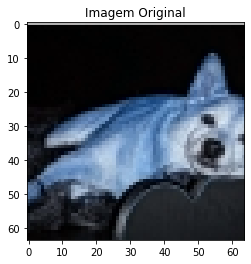

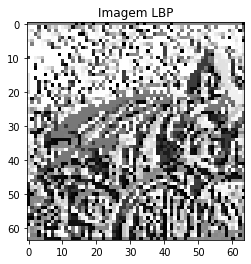

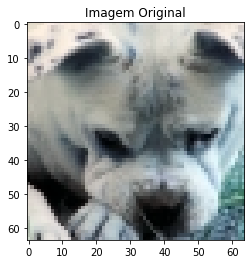

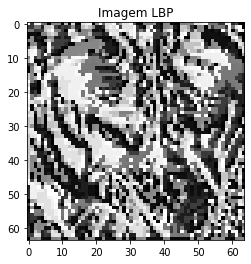

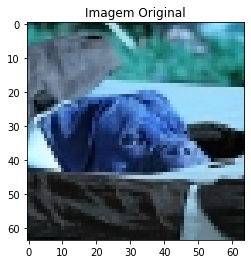

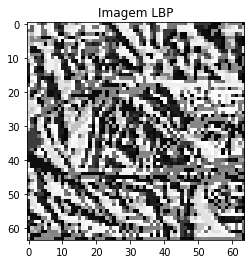

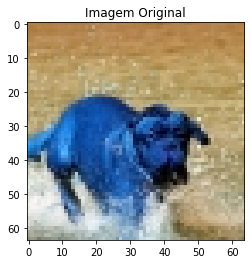

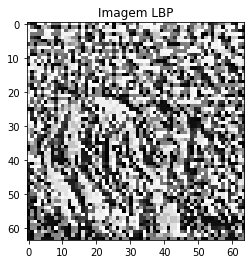

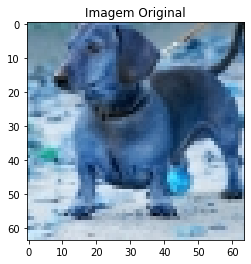

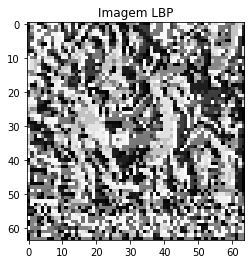

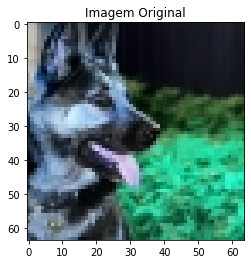

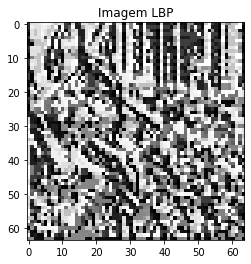

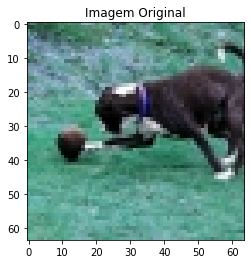

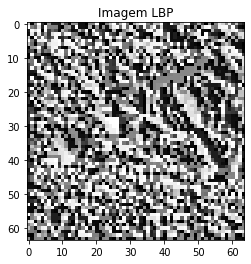

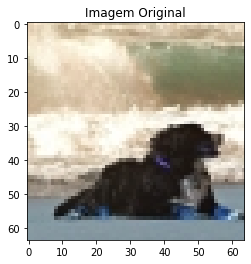

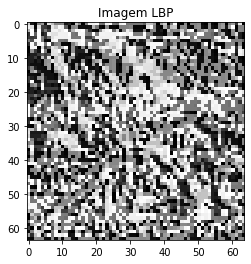

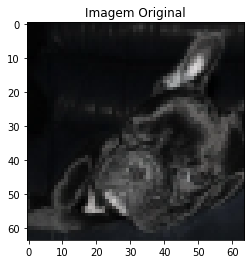

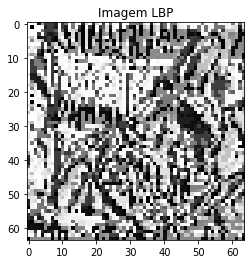

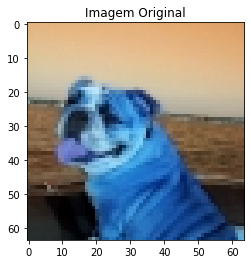

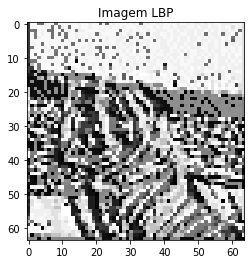

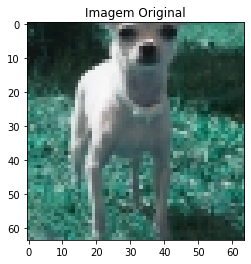

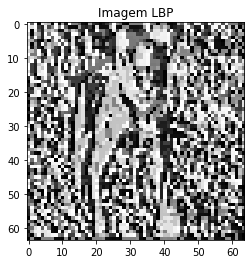

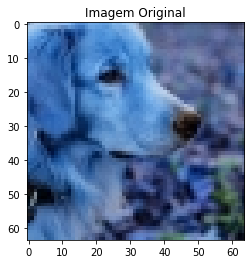

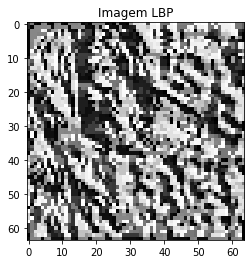

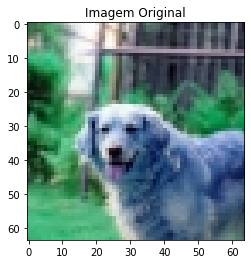

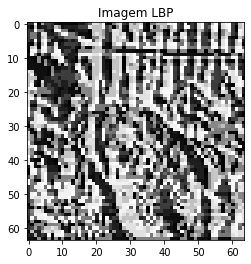

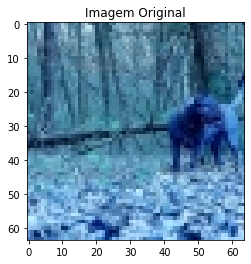

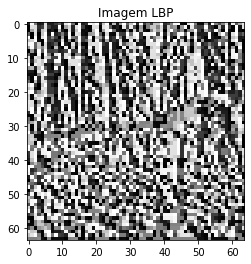

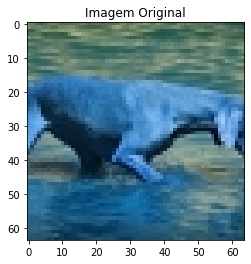

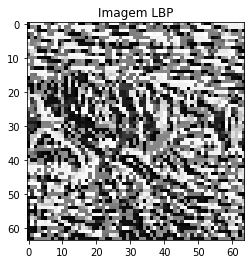

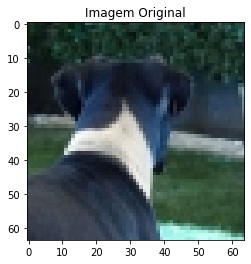

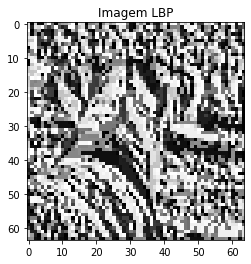

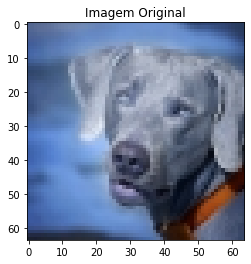

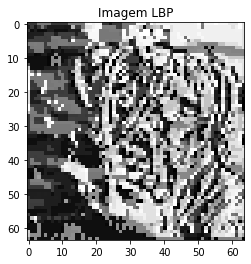

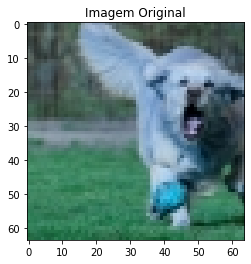

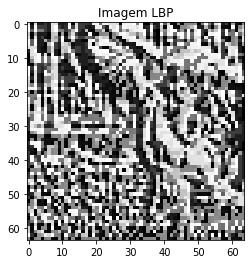

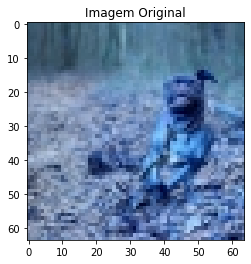

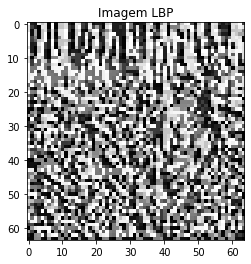

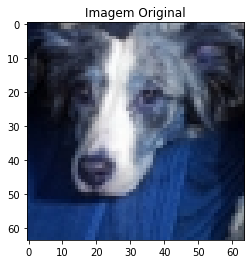

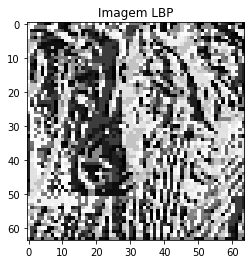

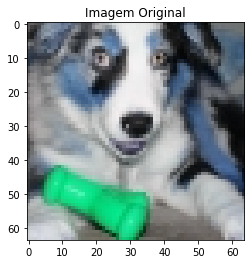

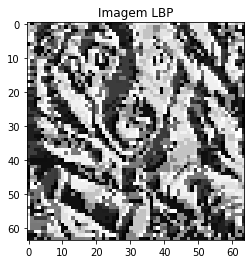

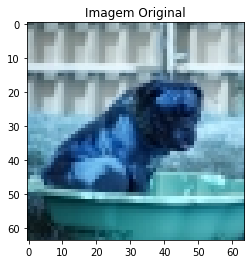

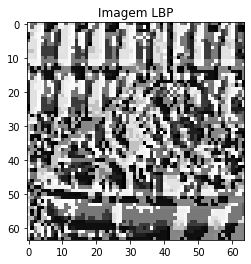

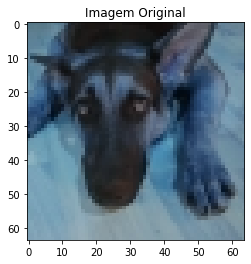

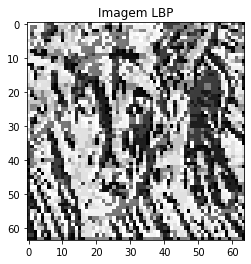

In [109]:
# define 1 para vizinhos que tem valores maiores ou iguais ao valor do centro
def get_pixel(img, center, x, y):
    new_value = 0  
    try:
        if img[x][y] >= center:
            new_value = 1            
    except:
        pass   
    return new_value
   
# Função para calcular operadores binários locais
def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
    #Como P = 8, então tem 8 direções
    # cima Esquerda
    val_ar.append(get_pixel(img, center, x-1, y-1))
    # Cima
    val_ar.append(get_pixel(img, center, x-1, y))
    # Cima Direita
    val_ar.append(get_pixel(img, center, x-1, y + 1))
    # Direita
    val_ar.append(get_pixel(img, center, x, y + 1))
    # Baixo Direita
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
    # Baixo
    val_ar.append(get_pixel(img, center, x + 1, y))
    # Baixo Esquerda
    val_ar.append(get_pixel(img, center, x + 1, y-1))
    # Esquerda
    val_ar.append(get_pixel(img, center, x, y-1))

    # Converter binário para decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0 
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]        
    return val

#Função para mostrar imagens
def fazer (path):
  images = [cv.imread(file, 1) for file in glob.glob(path)]

  for img_bgr in images:
    height, width, _ = img_bgr.shape

    # Converte imagem para cinza
    img_gray = cv.cvtColor(img_bgr,
                            cv.COLOR_BGR2GRAY)

    # Cria array do mesmo tamanho que a imagem
    img_lbp = np.zeros((height, width),
                      np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
    
    # Plota imagens
    plt.title("Imagem Original")
    plt.imshow(img_bgr)
    plt.show()
    plt.title("Imagem LBP")
    plt.imshow(img_lbp, cmap ="gray")
    plt.show()
    print("\n")

print("\n Classe Bird:\n")
fazer ('/content/gdrive/MyDrive/Multimidia/Lab4/img_q4/bird/*.jpg')
print("\n\n Classe Dog:\n")
fazer ('/content/gdrive/MyDrive/Multimidia/Lab4/img_q4/dog/*.jpg')
